In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Dataset : Paris Housing Price Prediction

    - src : https://www.kaggle.com/mssmartypants/paris-housing-price-prediction
    - This is a set of data created from imaginary data of house prices in an urban environment - Paris
    - All attributes are numeric variables and they are listed bellow:
            squareMeters
            numberOfRooms
            hasYard
            hasPool
            floors - number of floors
            cityCode - zip code
            cityPartRange - the higher the range, the more exclusive the neighbourhood is
            numPrevOwners - number of prevoious owners
            made - year
            isNewBuilt
            hasStormProtector
            basement - basement square meters
            attic - attic square meteres
            garage - garage size
            hasStorageRoom
            hasGuestRoom - number of guest rooms
price - predicted value

In [112]:
data = pd.read_csv('./data/ParisHousing.csv')
data.shape

(10000, 17)

In [113]:
data.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


array([[<AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'hasYard'}>,
        <AxesSubplot:title={'center':'hasPool'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityCode'}>,
        <AxesSubplot:title={'center':'cityPartRange'}>,
        <AxesSubplot:title={'center':'numPrevOwners'}>],
       [<AxesSubplot:title={'center':'made'}>,
        <AxesSubplot:title={'center':'isNewBuilt'}>,
        <AxesSubplot:title={'center':'hasStormProtector'}>,
        <AxesSubplot:title={'center':'basement'}>],
       [<AxesSubplot:title={'center':'attic'}>,
        <AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>,
        <AxesSubplot:title={'center':'hasGuestRoom'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

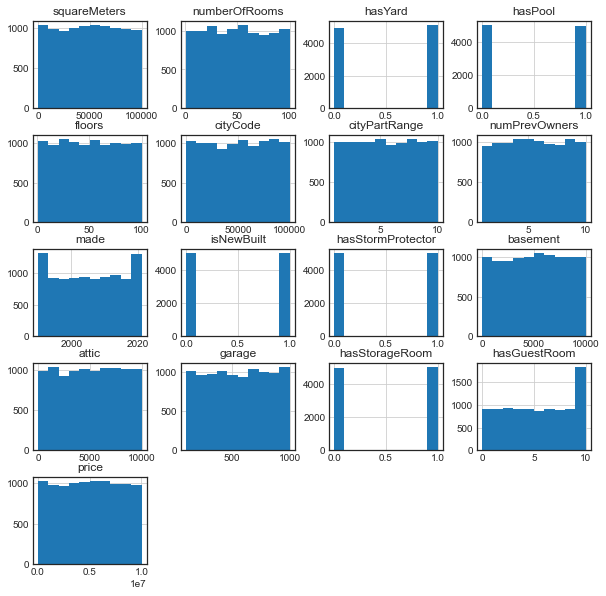

In [114]:
data.hist(figsize=(10,10))

In [115]:
data.corr(method='pearson')['price']

squareMeters         0.999999
numberOfRooms        0.009591
hasYard             -0.006119
hasPool             -0.005070
floors               0.001654
cityCode            -0.001539
cityPartRange        0.008813
numPrevOwners        0.016619
made                -0.007210
isNewBuilt          -0.010643
hasStormProtector    0.007496
basement            -0.003967
attic               -0.000600
garage              -0.017229
hasStorageRoom      -0.003485
hasGuestRoom        -0.000644
price                1.000000
Name: price, dtype: float64

In [116]:
data = data.drop(columns=['attic'])

In [117]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [118]:
x = np.array(data.iloc[:,:-1].values)
x = np.hstack((np.ones((data.shape[0],1)), x)) #for theta0 x0=1
y = np.array(data['price'])

In [119]:
x[0],y[0]

(array([1.0000e+00, 7.5523e+04, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        6.3000e+01, 9.3730e+03, 3.0000e+00, 8.0000e+00, 2.0050e+03,
        0.0000e+00, 1.0000e+00, 4.3130e+03, 9.5600e+02, 0.0000e+00,
        7.0000e+00]),
 7559081.5)

In [120]:
def normalize(x):
    return x/np.max(x, axis=0),np.max(x, axis=0)
x,temp_max = normalize(x)

In [121]:
x[0],y[0]

(array([1.        , 0.75523755, 0.03      , 0.        , 1.        ,
        0.63      , 0.09377407, 0.3       , 0.8       , 0.99208313,
        0.        , 1.        , 0.4313    , 0.956     , 0.        ,
        0.7       ]),
 7559081.5)

In [122]:
temp_max

array([1.0000e+00, 9.9999e+04, 1.0000e+02, 1.0000e+00, 1.0000e+00,
       1.0000e+02, 9.9953e+04, 1.0000e+01, 1.0000e+01, 2.0210e+03,
       1.0000e+00, 1.0000e+00, 1.0000e+04, 1.0000e+03, 1.0000e+00,
       1.0000e+01])

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [124]:
n=len(x_train[0])-1
n

15

In [125]:
m=len(x_train)
m

7000

<img src="multivariate_algo.png" height=70% width=70%>

In [126]:
def gd(x, y, theta, lr, itr):
    cost_plot = np.zeros(itr)
    for i in range(itr):
        y_cap = x.dot(theta)
        e = y_cap - y
        cost = 1 / (2 * m) * np.sum(e*e)
        cost_plot[i] = cost
        updated_theta = (lr / m) * x.transpose().dot(e)
        theta = theta - updated_theta
    plt.plot(range(1, itr + 1), cost_plot)
    plt.grid()
    plt.xlabel("iterations")
    plt.ylabel("cost")
    return theta

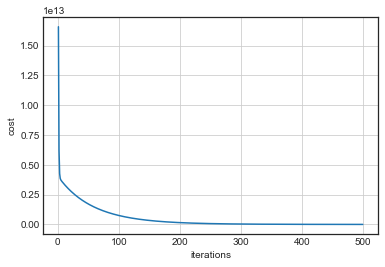

In [127]:
theta = np.zeros(n+1)
itr = 500
theta = gd(x_train, y_train, theta, 0.1, itr)

In [128]:
theta

array([ 201584.21130764, 9785071.21717525,  -41923.28350121,
        -14051.13150762,  -12761.03829541,  -49640.33610077,
        -58355.69207832,  -57220.33984346,  -49946.90874747,
        199400.34644051,  -15817.12264282,  -14172.20214017,
        -67135.19151601,  -94762.107097  ,  -13049.90538809,
        -47580.43247783])

In [129]:
y_pred = list()
for i in range(len(x_test)):
    y_pred.append(theta.dot(x_test[i]))

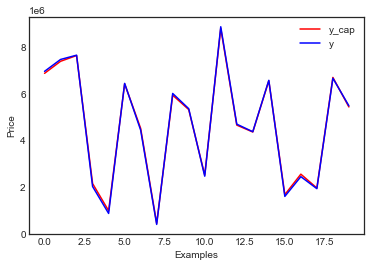

In [130]:
plt.figure()
plt.plot(range(20), y_pred[0:20], 'r', label="y_cap")
plt.plot(range(20), y_test[0:20], 'b', label="y")
plt.legend()
plt.xlabel("Examples")
plt.ylabel("Price")
plt.show()

In [131]:
for i in range(1,20):
    print(str(y_pred[i])+"\t"+str(y_test[i]))

7405119.227585909	7483945.9
7652270.238075688	7667431.3
2156991.3161879014	2030464.6
991562.9134331883	875920.6
6439473.362920426	6456934.5
4526161.896231256	4450503.3
449297.5354039193	404625.7
5949528.389497315	6024280.0
5333340.835541538	5371947.3
2523768.7263426157	2474395.5
8821848.274657784	8887849.4
4666349.755186205	4707409.7
4371037.3270085035	4383378.7
6569305.795172753	6588632.6
1682285.7175469717	1606948.7
2561091.4323901106	2454663.5
1966448.383547669	1939172.3
6712365.96637049	6677649.1
5445214.07647757	5494411.8


<img src="reg.JPG" height=70% width=70%>

In [132]:
def gd_r(x, y, theta, lr, itr , lambda_value):
    cost_plot = np.zeros(itr)
    theta_0 = theta[0]
    theta_1_n = theta[1:]
    for i in range(itr):
        y_cap = x.dot(theta)
        e = y_cap - y
        cost = 1 / (2 * m) * np.sum(e*e)
        cost_plot[i] = cost
        updated_theta_0 = (lr / m) * (x[:,0].dot(e))
        updated_theta_1_n = (lr / m) * ( (((x[:,1:]).transpose()).dot(e)) + ((lambda_value/m) * theta_1_n) )
        theta = theta - np.hstack((updated_theta_0, updated_theta_1_n))
    plt.plot(range(1, itr + 1), cost_plot)
    plt.grid()
    plt.xlabel("iterations")
    plt.ylabel("cost")
    return theta

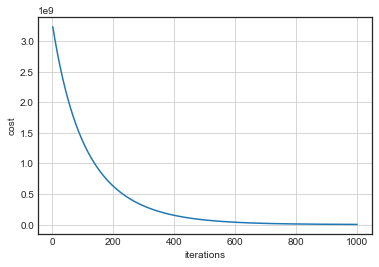

In [133]:
theta_r = gd_r(x_train, y_train, theta, 0.1, 1000,0.2)

In [139]:
theta_r

array([ 6.89661881e+03,  9.99746216e+06, -2.04197309e+03,  2.50151252e+03,
        2.50199203e+03,  3.25549527e+03, -2.27395285e+03, -2.05252177e+03,
       -2.31281380e+03,  6.16421515e+03, -3.49527348e+02, -3.52515333e+02,
       -2.61626756e+03, -3.39951180e+03, -3.12073992e+02, -2.03773057e+03])

In [134]:
y_pred_r = list()
for i in range(len(x_test)):
    y_pred_r.append(theta_r.dot(x_test[i]))

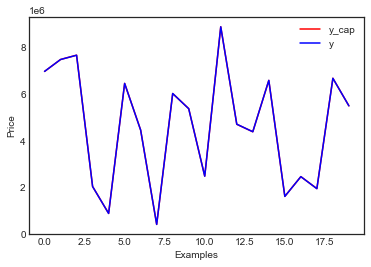

In [135]:
plt.figure()
plt.plot(range(20), y_pred_r[0:20], 'r', label="y_cap")
plt.plot(range(20), y_test[0:20], 'b', label="y")
plt.legend()
plt.xlabel("Examples")
plt.ylabel("Price")
plt.show()

In [136]:
print("Actual \t\tWithout regularization\tWith regularization\t diffrence without r\tdiffrence with reg")
print("---------------------------------------------------------------------------------------------------------")
for i in range(1,20):
    print(str(y_test[i])+"\t"+str(y_pred[i])+"\t"+str(y_pred_r[i])+"\t"+str(y_test[i]-y_pred[i])+"\t"+str(y_test[i]-y_pred_r[i]))

Actual 		Without regularization	With regularization	 diffrence without r	diffrence with reg
---------------------------------------------------------------------------------------------------------
7483945.9	7405119.227585909	7484260.3268732	78826.67241409142	-314.4268731996417
7667431.3	7652270.238075688	7670049.218217534	15161.061924312264	-2617.9182175341994
2030464.6	2156991.3161879014	2033091.0071789601	-126526.71618790133	-2626.407178960042
875920.6	991562.9134331883	876736.0387138826	-115642.31343318836	-815.4387138825841
6456934.5	6439473.362920426	6457752.668607149	17461.137079574168	-818.1686071492732
4450503.3	4526161.896231256	4454091.57760458	-75658.59623125661	-3588.2776045799255
404625.7	449297.5354039193	405549.99198451283	-44671.83540391928	-924.2919845128199
6024280.0	5949528.389497315	6020912.987933868	74751.61050268542	3367.012066132389
5371947.3	5333340.835541538	5375239.91652462	38606.46445846185	-3292.6165246199816
2474395.5	2523768.7263426157	2478355.947297246	-

In [138]:
for i in range(1,20):
    print(str(y_test[i])+"\t"+str(y_test[i]-y_pred[i])+"\t"+str(y_test[i]-y_pred_r[i]))

7483945.9	78826.67241409142	-314.4268731996417
7667431.3	15161.061924312264	-2617.9182175341994
2030464.6	-126526.71618790133	-2626.407178960042
875920.6	-115642.31343318836	-815.4387138825841
6456934.5	17461.137079574168	-818.1686071492732
4450503.3	-75658.59623125661	-3588.2776045799255
404625.7	-44671.83540391928	-924.2919845128199
6024280.0	74751.61050268542	3367.012066132389
5371947.3	38606.46445846185	-3292.6165246199816
2474395.5	-49373.22634261567	-3960.4472972461954
8887849.4	66001.12534221634	-2352.482319317758
4707409.7	41059.94481379539	4009.7162866061553
4383378.7	12341.372991496697	1651.7615007190034
6588632.6	19326.804827246815	2292.978446104564
1606948.7	-75337.0175469718	-1974.8763127131388
2454663.5	-106427.93239011057	-2043.487989813555
1939172.3	-27276.083547668997	-2413.7064878074452
6677649.1	-34716.86637049075	-301.9295767042786
5494411.8	49197.723522429354	516.595626979135


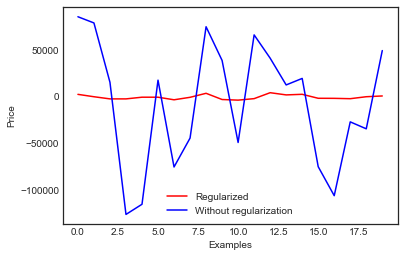

In [137]:
graph_r = list()
graph_wr = list()
for i in range(0,20):
    graph_r.append(y_test[i]-y_pred_r[i])
    graph_wr.append(y_test[i]-y_pred[i])
plt.figure()
plt.plot(range(20), graph_r, 'r', label="Regularized")
plt.plot(range(20), graph_wr, 'b', label="Without regularization")
plt.legend()
plt.xlabel("Examples")
plt.ylabel("Price")
plt.show()